# Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import folium
from datetime import datetime
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [2]:
df=pd.read_excel('time-series-data.xlsx')

In [3]:
df.head()

,Country,Localite,Category,Value,Date
0,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Cases,86,2014-03-24
1,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59,2014-03-24
2,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86,2014-03-25
3,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60,2014-03-25
4,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86,2014-03-26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58635 entries, 0 to 58634
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Country   58635 non-null  object        
 1   Localite  58635 non-null  object        
 2   Category  58635 non-null  object        
 3   Value     58217 non-null  object        
 4   Date      58635 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 2.2+ MB


In [5]:
df.shape

(58635, 5)

In [6]:
df['Value']=pd.to_numeric(df['Value'],errors='coerce')

In [7]:
df.isna().sum()

Country       0
Localite      0
Category      0
Value       425
Date          0
dtype: int64

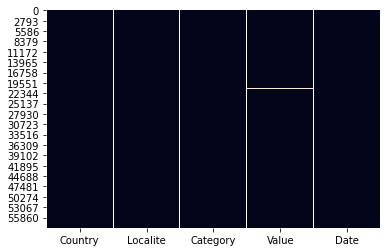

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
df=df.dropna(subset=['Value'])

In [10]:
df.shape

(58210, 5)

In [11]:
df['Value'].dtypes

dtype('float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58210 entries, 0 to 58634
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Country   58210 non-null  object        
 1   Localite  58210 non-null  object        
 2   Category  58210 non-null  object        
 3   Value     58210 non-null  float64       
 4   Date      58210 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.7+ MB


In [13]:
# df['Year']=df.Date.dt.year
# df['Month_name']=df.Date.dt.month_name()
# df['Day_name']=df.Date.dt.day_name()
# df['Month']=df.Date.dt.month
# df['Week']=df.Date.dt.week
# df['Day_of_year']= df.Date.dt.dayofyear



In [14]:
df.Category.unique()

array(['Cases', 'Deaths', 'Suspected cases', 'Confirmed cases',
       'Probable cases', 'New cases', 'New Cases', 'Suspected Cases'],
      dtype=object)

In [15]:
di={'Suspected cases':'Suspected Cases','New cases':'New Cases'}
df=df.replace({"Category":di})

In [60]:
df.columns

Index(['Country', 'Localite', 'Category', 'Value', 'Date'], dtype='object')

In [175]:
df_1= pd.pivot_table(df,values='Value',columns='Category',index=['Date','Country'],fill_value=0)

In [176]:

df_1=df_1.reset_index()


df_1=df_1.sort_values(by='Date')
df_1= df_1[df_1.Date !='1900-01-04']  # It is fault so I am remov


In [191]:
df_1

Category,Date,Country,Cases,Confirmed cases,Deaths,New Cases,Probable cases,Suspected Cases
1,2014-03-24,Guinea,86.000000,0.000000,59.000000,0.000000,0.000000,0.000000
2,2014-03-25,Guinea,86.000000,0.000000,60.000000,0.000000,0.000000,0.000000
3,2014-03-26,Guinea,86.000000,0.000000,62.000000,0.000000,0.000000,0.000000
4,2014-03-27,Guinea,103.000000,0.000000,66.000000,0.000000,0.000000,0.000000
5,2014-03-28,Guinea,0.000000,0.000000,70.000000,0.000000,0.000000,18.500000
...,...,...,...,...,...,...,...,...
673,2015-03-24,Sierra Leone,1577.066667,1134.933333,501.066667,1.066667,38.266667,403.866667
674,2015-03-25,Sierra Leone,1578.666667,1135.333333,501.733333,0.133333,38.266667,405.066667
675,2015-03-26,Sierra Leone,1581.733333,1135.733333,502.933333,0.400000,38.266667,407.733333
676,2015-03-27,Sierra Leone,1584.133333,1136.133333,503.733333,0.400000,38.266667,409.733333


In [182]:
df_1.groupby('Country')['Cases','Deaths'].sum()


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Category,Cases,Deaths
Country,,
Guinea,42110.232926,27219.290679
Liberia,109399.868082,49210.982534
Mali,11.419913,8.866883
Nigeria,390.000000,133.333333
Senegal,16.666667,0.000000
Sierra Leone,189649.333333,62803.938095


In [193]:
print('The data is from :',df_1.Date.min(), 'to', df_1.Date.max())

print('The total number of Cases is', df_1['Cases'].sum())
print('The total number of Confirmed Cases is', df_1['Confirmed cases'].sum())
print('The total number of Deaths is', df_1['Deaths'].sum())
print('The total number of Probable cases is', df_1['Probable cases'].sum())
print('The total number of Suspected Cases is', df_1['Suspected Cases'].sum())


The data is from : 2014-03-24 00:00:00 to 2015-03-28 00:00:00
The total number of Cases is 341577.520921735
The total number of Confirmed Cases is 217671.4917619428
The total number of Deaths is 139376.41152474802
The total number of Probable cases is 35557.72032330729
The total number of Suspected Cases is 77666.8453200405


In [195]:
# Countries with the highest number of Confirmed cases

df_1.groupby('Country')['Confirmed cases'].sum().nlargest(3)

Country
Sierra Leone    145877.036200
Liberia          37388.658974
Guinea           34113.581220
Name: Confirmed cases, dtype: float64

In [197]:
# Countries with the highest number of Deaths

df_1.groupby('Country')['Deaths'].sum().nlargest(3)

Country
Sierra Leone    62803.938095
Liberia         49210.982534
Guinea          27219.290679
Name: Deaths, dtype: float64

In [198]:
# Countries with the highest number of 'Probable cases'

df_1.groupby('Country')['Probable cases'].sum().nlargest(3)

Country
Liberia         26910.429504
Sierra Leone     4458.885714
Guinea           4171.465711
Name: Probable cases, dtype: float64

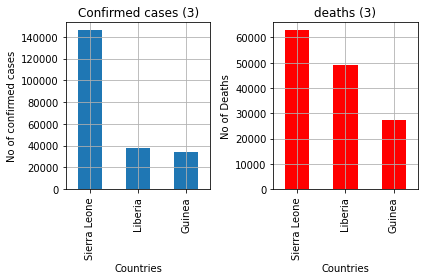

In [199]:
# Barcharts showing Countries with the highest number of confirmed cases and highest number of Deaths


plt.subplot(1,2,1)
df_1.groupby('Country')['Confirmed cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Confirmed cases (3)')
plt.xlabel('Countries')
plt.ylabel('No of confirmed cases')


plt.subplot(1,2,2)
df_1.groupby('Country')['Deaths'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('deaths (3)')
plt.xlabel('Countries')
plt.ylabel('No of Deaths')
plt.tight_layout()
plt.show()



In [201]:
#Countries with the top 3 highest number of suspected cases
df_1.groupby('Country')['Suspected Cases'].sum().nlargest(3)

Country
Sierra Leone    39348.247619
Liberia         37499.848810
Guinea            809.748891
Name: Suspected Cases, dtype: float64

In [202]:
#Countries with the top 3 highest number of Probable cases
df_1.groupby('Country')['Probable cases'].sum().nlargest(3)

Country
Liberia         26910.429504
Sierra Leone     4458.885714
Guinea           4171.465711
Name: Probable cases, dtype: float64

In [196]:
df_1.columns

Index(['Date', 'Country', 'Cases', 'Confirmed cases', 'Deaths', 'New Cases',
       'Probable cases', 'Suspected Cases'],
      dtype='object', name='Category')

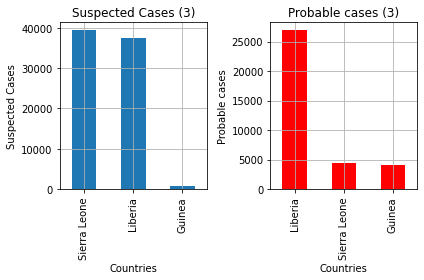

In [204]:
# Barcharts showing Countries with the highest number of Suspected cases and highest number of Probable cases


plt.subplot(1,2,1)
df_1.groupby('Country')['Suspected Cases'].sum().nlargest(3).plot(kind = 'bar', grid = True)
plt.title('Suspected Cases (3)')
plt.xlabel('Countries')
plt.ylabel('Suspected Cases')

plt.subplot(1,2,2)
df_1.groupby('Country')['Probable cases'].sum().nlargest(3).plot(kind = 'bar', grid = True,
                                                                       color = 'red')
plt.title('Probable cases (3)')
plt.xlabel('Countries')
plt.ylabel('Probable cases')
plt.tight_layout()
plt.show()

In [210]:
# Creating the Coropleth

fig = go.Figure(data=go.Choropleth(
    locations = df_1['Country'],
    locationmode = 'country names',
    z = df_1['Confirmed cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    )
)

In [207]:
df_1.columns

Index(['Date', 'Country', 'Cases', 'Confirmed cases', 'Deaths', 'New Cases',
       'Probable cases', 'Suspected Cases'],
      dtype='object', name='Category')

In [218]:
df_1_total=df_1.groupby('Country')['Cases','Deaths'].sum()
df_1_total=df_1_total.reset_index()

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [219]:
df_1_total

Category,Country,Cases,Deaths
0,Guinea,42110.232926,27219.290679
1,Liberia,109399.868082,49210.982534
2,Mali,11.419913,8.866883
3,Nigeria,390.000000,133.333333
4,Senegal,16.666667,0.000000
5,Sierra Leone,189649.333333,62803.938095


In [220]:
fig = px.choropleth(df_1_total, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                            scope ="africa",
                    color_continuous_scale="dense",
                     labels={'Cases':'Cases'},
                     title={
                         'text': "EBOLA Total Cases",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()

In [221]:
fig = px.choropleth(df_1_total, locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                            scope ="africa",
                    color_continuous_scale="dense",
                     labels={'Deaths':'Deaths'},
                     title={
                         'text': "EBOLA Total Deaths",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})
fig.show()

In [256]:
# df_Guinea= df_1[df_1['Country']=='Guinea'].set_index('Date')
# df_Liberia= df_1[df_1['Country']=='Liberia'].set_index('Date')
# df_Sierra= df_1[df_1['Country']=='Sierra Leone'].set_index('Date')
# df_Nigeria= df_1[df_1['Country']=='Nigeria'].set_index('Date')
# df_Senegal= df_1[df_1['Country']== 'Senegal'].set_index('Date')
# df_Mali= df_1[df_1['Country']== 'Mali'].set_index('Date')


No handles with labels found to put in legend.


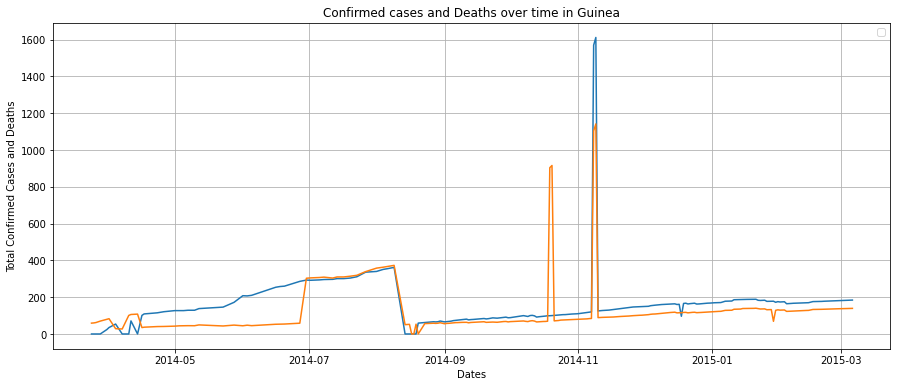

In [252]:
# # Plot the Total Cases and Deaths over times in Guinea

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Guinea['Confirmed cases'])
# plt.plot(df_Guinea['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Guinea')
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


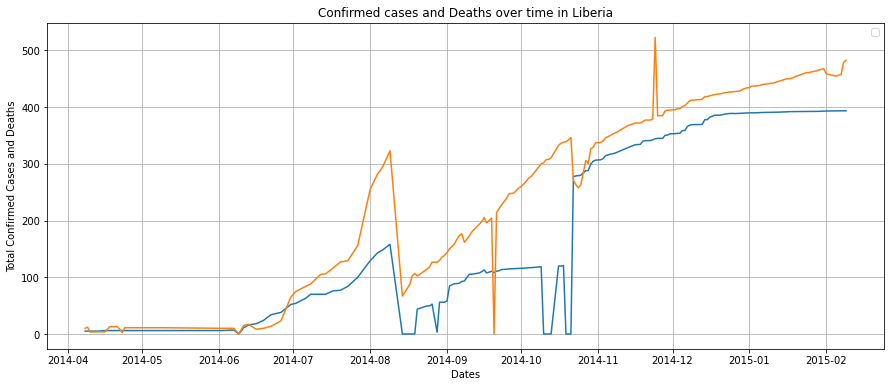

In [257]:
# # Plot the Total Cases and Deaths over times in Liberia

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Liberia['Confirmed cases'])
# plt.plot(df_Liberia['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Liberia')
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


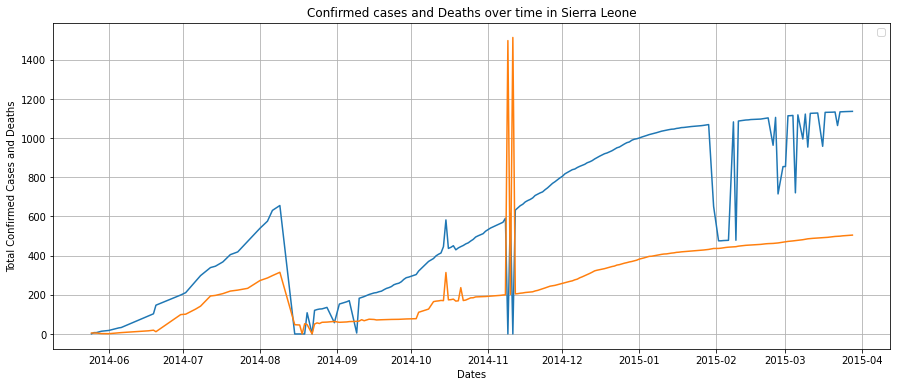

In [258]:
# # Plot the Total Cases and Deaths over times in Sierra Leone

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Sierra['Confirmed cases'])
# plt.plot(df_Sierra['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Sierra Leone')
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


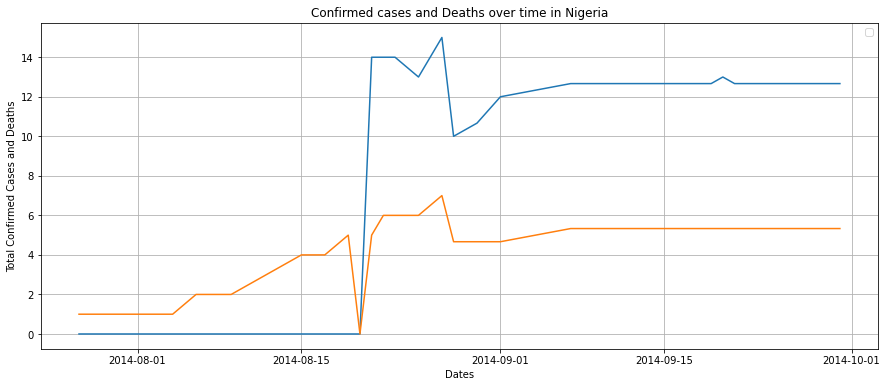

In [259]:
# # Plot the Total Cases and Deaths over times in Nigeria

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Nigeria['Confirmed cases'])
# plt.plot(df_Nigeria['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Nigeria')
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


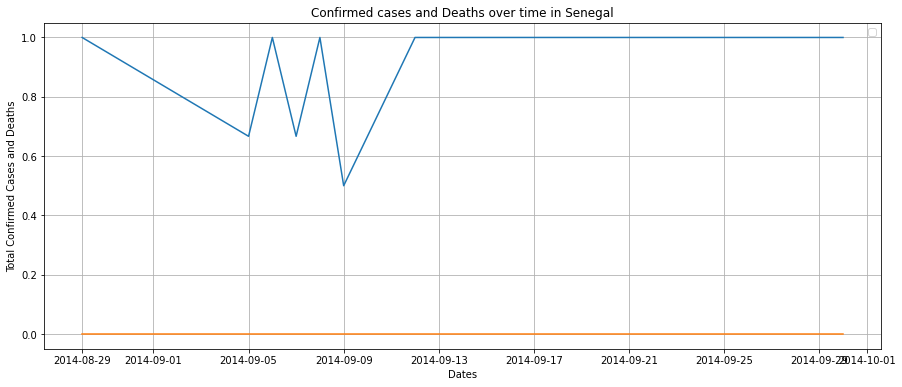

In [260]:
# # Plot the Total Cases and Deaths over times in Senegal

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Senegal['Confirmed cases'])
# plt.plot(df_Senegal['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Senegal')
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


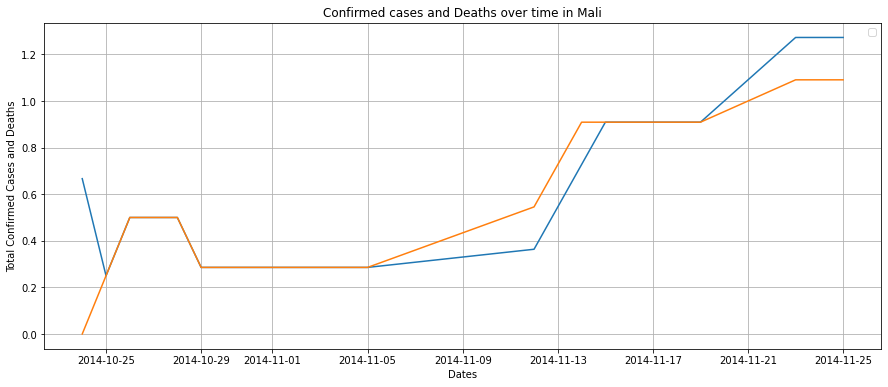

In [261]:
# # Plot the Total Cases and Deaths over times in Mali

# plt.figure(figsize=(15,6))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Total Confirmed Cases and Deaths')
# plt.plot(df_Mali['Confirmed cases'])
# plt.plot(df_Mali['Deaths'])
# plt.title('Confirmed cases and Deaths over time in Mali')
# plt.legend()
# plt.show()

In [21]:
# Now Modeling using ARIMA 

In [16]:
df.head()

,Country,Localite,Category,Value,Date
0,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Cases,86.0,2014-03-24
1,Guinea,"Guekedou, Macenta, Nzerekore and Kissidougou",Deaths,59.0,2014-03-24
2,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86.0,2014-03-25
3,Guinea,"( Guekedou, Macenta and Kissidougou",Deaths,60.0,2014-03-25
4,Guinea,"( Guekedou, Macenta and Kissidougou",Cases,86.0,2014-03-26


In [17]:
df.Category.unique()

array(['Cases', 'Deaths', 'Suspected Cases', 'Confirmed cases',
       'Probable cases', 'New Cases'], dtype=object)

In [18]:
df_Guinea=df[df.Country=='Guinea'][df.Localite=='National'][df.Category=='Confirmed cases']
df_Guinea=df_Guinea[['Value','Date']].set_index('Date').sort_values(by='Date', ascending=True)
df_Guinea.head()


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Value
Date,
2014-03-31,24.0
2014-04-01,35.0
2014-04-04,54.0
2014-04-11,71.0
2014-04-16,101.0


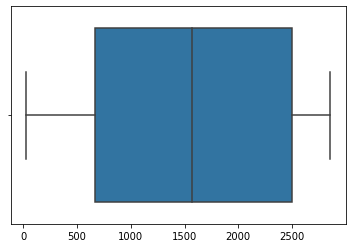

In [19]:
sns.boxplot(df_Guinea)


In [20]:
indexDataset= df_Guinea
indexDataset.head()

,Value
Date,
2014-03-31,24.0
2014-04-01,35.0
2014-04-04,54.0
2014-04-11,71.0
2014-04-16,101.0


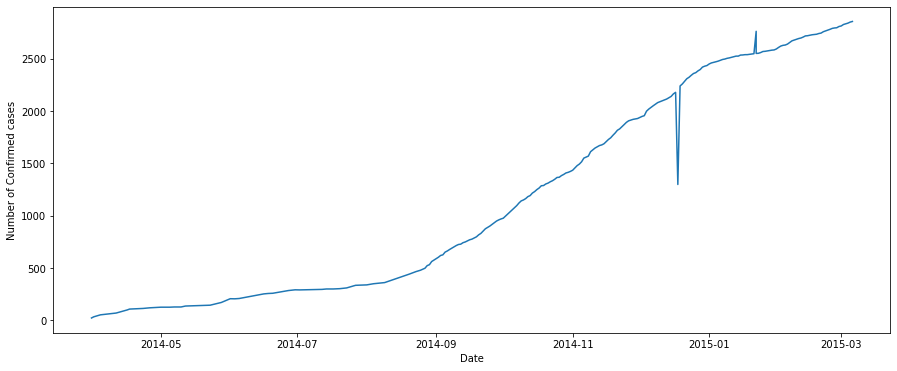

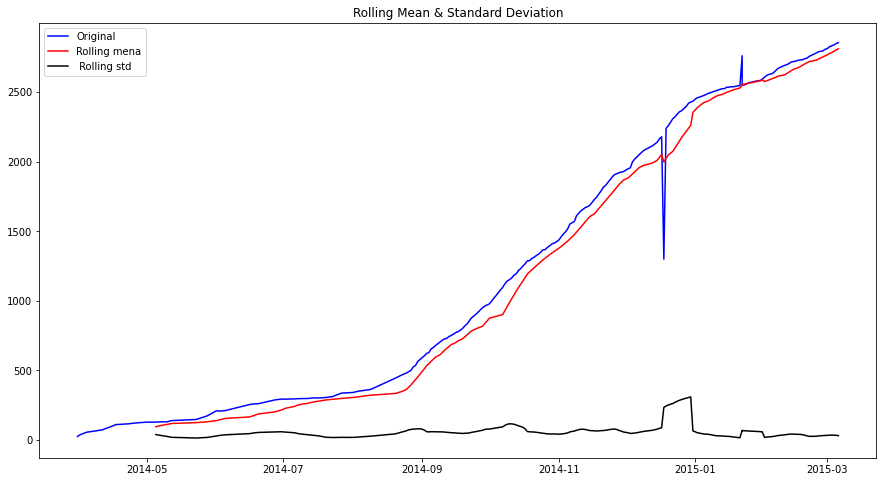

In [21]:
#plot graph.
plt.figure(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Number of Confirmed cases')
plt.plot(indexDataset)


# Determining rolling statistics
rolmean = indexDataset.rolling(window=12).mean()
rolstd = indexDataset.rolling(window=12).std()
# print(rolmean,rolstd)

# Plot rolling statistics

plt.figure( figsize=(15,8))
orig= plt.plot(indexDataset, color='blue',label='Original')
mean= plt.plot(rolmean, color='red',label='Rolling mena')
std= plt.plot(rolstd, color='black', label=' Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [22]:
print(indexDataset.head())
print(indexDataset.shape)

            Value
Date             
2014-03-31   24.0
2014-04-01   35.0
2014-04-04   54.0
2014-04-11   71.0
2014-04-16  101.0
(210, 1)


In [23]:
# Spliting Dataset into training and testing

In [24]:
train= indexDataset.iloc[:-60]
test= indexDataset.iloc[-60:]

print(train.shape)
print(test.shape)

(150, 1)
(60, 1)


In [25]:
# ARIMA model

Guinea_model= ARIMA(train,order=(3,1,2))
Guinea_model_fit= Guinea_model.fit()
Guinea_forcast= Guinea_model_fit.forecast(steps=60)[0]

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [26]:
# Checking the accuracy of the Model
np.sqrt(mean_squared_error(test['Value'],Guinea_forcast))

344.28220120454836

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



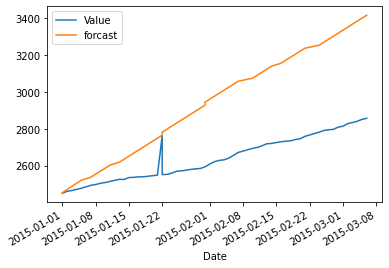

In [27]:
test['forcast']= Guinea_forcast
test.plot()

In [28]:
# Perform Dickey Fuller test : method-1
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test :')
dftest= adfuller(indexDataset['Value'],autolag='AIC')

dfoutput= pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]= value

print(dfoutput)    


#---------------------------------------------------------------
# # Perform Dickey Fuller test : method-2
# from statsmodels.tsa.stattools import adfuller

# def ad_test(dataset):
#     dftest=adfuller(dataset, autolag='AIC')
#     print("1.ADF :", dftest[0])
#     print("2.P-Value :", dftest[1])
#     print("3.Num of Lags :", dftest[2])
#     print("4.Number of observations used for ADF Regressiomn and Critical value calculation :", dftest[3])
#     print("5. Critical Values :")
#     for key, val in dftest[4].items():
#         print("\t", key, ":", val)   

# ad_test(indexDataset['Value'])
    

Result of Dickey-Fuller Test :
Test Statistics                 -0.973732
p-value                          0.762724
#Lags Used                       5.000000
Number of Observations Used    204.000000
Critical Value (1%)             -3.462818
Critical Value (5%)             -2.875815
Critical Value (10%)            -2.574379
dtype: float64


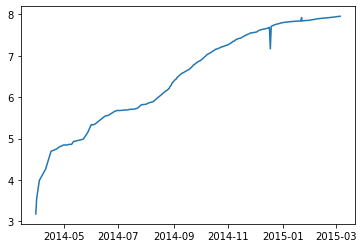

In [29]:
# Now taking log

df_log= np.log(indexDataset)
plt.plot(df_log)

In [30]:
# Let's create a function which determine wheather a the given time series is stationary

def check_stationarity(dataset):
    
    # rolling statistics
    rolling_mean = dataset.rolling(window=2).mean()
    rollingh_std = dataset.rolling(window=2).std()
    
    # rolling plot
    original =plt.plot(dataset, color='blue', label='Original')
    mean= plt.plot( rolling_mean, color='red', label='Rolling Mean')
    std= plt.plot(rollingh_std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Std Deviation')
    plt.grid()
    plt.show(block=False)
    
    # Dickey-Fuller test:
    result= adfuller( dataset['Value'])
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('# Lag Used: {}'.format(result[2]))
    print('Critical Values:')
    
    for key, value in result[4].items():
        print('\t{}:{}'.format(key, value))

    


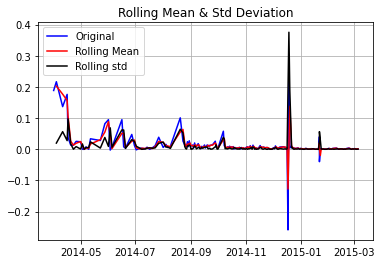

ADF Statistics:-3.216526467972289
p-value: 0.019047771878463918
# Lag Used: 15
Critical Values:
	1%:-3.4646940755442612
	5%:-2.8766348847254934
	10%:-2.5748163958763994


In [40]:
rolling_mean = df_log.rolling(window=2).mean()
df_log_minus_mean = df_log-rolling_mean
df_log_minus_mean.dropna(inplace=True)

check_stationarity(df_log_minus_mean)

In [ ]:
# # Now applying Exponential decay method to check stationarity

# rolling_mean_exp_decay = df_log.ewm(halflife=2, min_periods=0, adjust=True).mean()
# df_log_exp_decay= df_log- rolling_mean_exp_decay

# df_log_exp_decay.dropna(inplace=True)

# check_stationarity(df_log_exp_decay)

#-----------------------------------------------------------
## Now applying time shifting method to check stationarity

# df_log_shift= df_log- df_log.shift()
# df_log_shift.dropna(inplace=True)

# check_stationarity(df_log_shift)



In [ ]:
df_log_minus_mean.head()

In [ ]:
# Figure out Order for ARIMA Model using auto-arima

from pmdarima import auto_arima
# ignore harmless warning
import warnings
warnings.filterwarnings("ignore")

In [50]:
stepwise_fit = auto_arima(indexDataset['Value'], trace= True, suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=2406.939, BIC=2426.993, Time=0.454 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2489.062, BIC=2495.747, Time=0.015 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2435.616, BIC=2445.643, Time=0.066 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2401.129, BIC=2411.156, Time=0.158 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2491.509, BIC=2494.851, Time=0.012 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2402.956, BIC=2416.325, Time=0.219 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2402.945, BIC=2416.314, Time=0.227 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2405.095, BIC=2421.807, Time=0.240 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 1.403 seconds


In [51]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1197.564
Date:                Tue, 08 Dec 2020   AIC                           2401.129
Time:                        23:19:34   BIC                           2411.156
Sample:                             0   HQIC                          2405.183
                                - 210                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6129      2.585      5.266      0.000       8.546      18.680
ma.L1         -0.7122      0.026    -26.979      0.000      -0.764      -0.660
sigma2      5534.0139    155.584     35.569      0.000    5229.075    5838.953
===================================================================================
Ljung-Box (Q):                       14.94   Jarque-Bera (JB):             72349.60
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.18   Skew:                            -7.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
indexDataset.shape

(210, 1)

In [35]:
# # Now Modeling
# from statsmodels.tsa.arima_model import ARIMA

# print(indexDataset.shape)
# train=indexDataset.iloc[:-60]
# test=indexDataset.iloc[-60:]

# print(train.shape, test.shape)


(210, 1)
(150, 1) (60, 1)


In [97]:
model= ARIMA(df_log, order=(0,1,12))

result_ARIMA = model.fit( disp=1)

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [98]:
# # Train the Model

# model= ARIMA( train['Value'], order=(0,1,1))
# model_fit= model.fit()
# model_fit.summary()

# # Now forcasting
# model_forcast= model_fit.forecast(steps=60)[0]

predictions_ARIMA_dff = pd.Series(result_ARIMA.fittedvalues,copy=True)

print(predictions_ARIMA_dff.head())

Date
2014-04-01    0.032163
2014-04-04    0.168765
2014-04-11    0.271375
2014-04-16    0.302270
2014-04-17    0.280057
dtype: float64


In [99]:
# Convert to cumulative sum
predictions_ARIMA_dff_cusum= predictions_ARIMA_dff.cumsum()
print(predictions_ARIMA_dff_cusum.head())

Date
2014-04-01    0.032163
2014-04-04    0.200928
2014-04-11    0.472303
2014-04-16    0.774574
2014-04-17    1.054630
dtype: float64


In [100]:
predictions_ARIMA_log=pd.Series(df_log['Value'].iloc[0], index= df_log.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(predictions_ARIMA_dff_cusum, fill_value=0)
predictions_ARIMA_log.head()

Date
2014-03-31    3.178054
2014-04-01    3.210217
2014-04-04    3.378982
2014-04-11    3.650357
2014-04-16    3.952628
dtype: float64

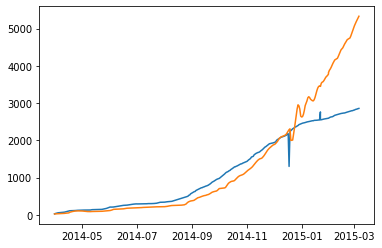

In [101]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexDataset)
plt.plot(predictions_ARIMA)

In [81]:
# Now Ckecking the accuracy of ARIMA model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(model_forcast, test['Value']))
print(rmse)

336.5741339029237


In [38]:
# Now Converting forcatsted values into dataframe
model_forcast=pd.DataFrame(model_forcast, index=test.index)

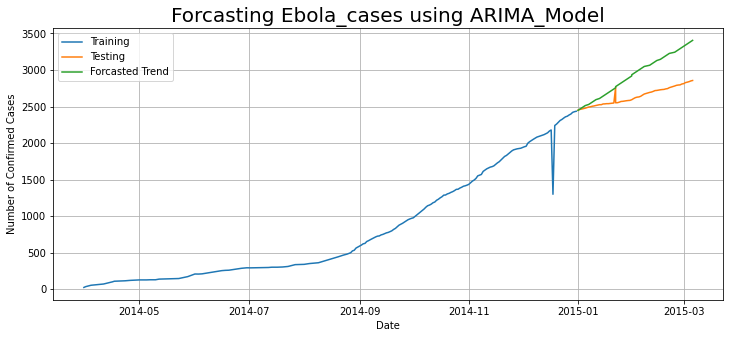

In [39]:
# Plotting the graph between traing, testing and Forcasted values

plt.figure(figsize=(12,5))
plt.plot(train, label='Training')

plt.plot(test, label='Testing')
plt.plot(model_forcast, label='Forcasted Trend')
plt.title('Forcasting Ebola_cases using ARIMA_Model',fontdict={'fontsize':20,'fontweight' :1})
plt.xlabel('Date',fontdict={'fontsize':10,'fontweight' :1})
plt.ylabel('Number of Confirmed Cases',fontdict={'fontsize':10,'fontweight' :1})

plt.legend()
plt.grid()



In [99]:
# Now Making Prediction  on Test set
start = len(train)
end= len(train)+len(test)-1
pred= model.predict(start=start, end= end, typ='levels')
pred.index=df_log.index[start:end+1]
print(pred)

Date
2014-12-31   -0.000385
2015-01-01   -0.001244
2015-01-02   -0.002320
2015-01-03   -0.003335
2015-01-04   -0.004367
2015-01-05   -0.005394
2015-01-07   -0.006422
2015-01-08   -0.007450
2015-01-09   -0.008478
2015-01-10   -0.009506
2015-01-11   -0.010534
2015-01-13   -0.011562
2015-01-14   -0.012590
2015-01-15   -0.013618
2015-01-16   -0.014646
2015-01-17   -0.015674
2015-01-18   -0.016702
2015-01-19   -0.017730
2015-01-20   -0.018758
2015-01-21   -0.019786
2015-01-22   -0.020815
2015-01-22   -0.021843
2015-01-23   -0.022871
2015-01-24   -0.023899
2015-01-25   -0.024927
2015-01-26   -0.025955
2015-01-27   -0.026983
2015-01-28   -0.028011
2015-01-29   -0.029039
2015-01-30   -0.030067
2015-01-31   -0.031095
2015-01-31   -0.032123
2015-02-01   -0.033151
2015-02-02   -0.034179
2015-02-03   -0.035207
2015-02-04   -0.036235
2015-02-05   -0.037263
2015-02-06   -0.038291
2015-02-07   -0.039319
2015-02-10   -0.040347
2015-02-11   -0.041375
2015-02-12   -0.042404
2015-02-13   -0.043432
2015-0

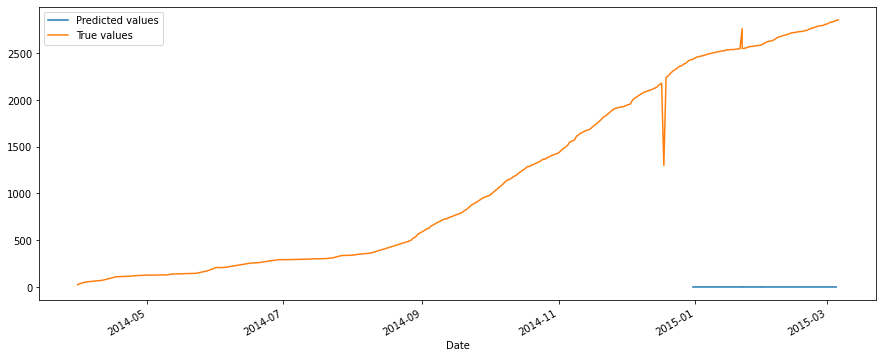

In [100]:
# Now plotting the predicted values
plt.figure(figsize=(15,6))
pred.plot(legend=True, label='Predicted values' )
df_Guinea['Value'].plot(legend=True, label='True values')

In [56]:
# Now Ckecking the accuracy of ARIMA model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(pred, test['Value']))
print(rmse)

0.03731550250909729


# Now Applying SVR Model to predict the Ebola Virus

In [22]:
df_SVR= df_Guinea.reset_index()
df_SVR

,Date,Value
0,2014-03-31,24.0
1,2014-04-01,35.0
2,2014-04-04,54.0
3,2014-04-11,71.0
4,2014-04-16,101.0
...,...,...
205,2015-03-02,2827.0
206,2015-03-03,2833.0
207,2015-03-04,2840.0
208,2015-03-05,2850.0


In [ ]:
# df['Year']=df.Date.dt.year
# df['Month_name']=df.Date.dt.month_name()
# df['Day_name']=df.Date.dt.day_name()
# df['Month']=df.Date.dt.month
# df['Week']=df.Date.dt.week
# df['Day_of_year']= df.Date.dt.dayofyear


In [43]:
df_SVR['No_of_Days']=df_SVR.index.values+1

In [50]:
df_SVR

,Date,Value,No_of_Days
0,2014-03-31,24.0,1
1,2014-04-01,35.0,2
2,2014-04-04,54.0,3
3,2014-04-11,71.0,4
4,2014-04-16,101.0,5
...,...,...,...
205,2015-03-02,2827.0,206
206,2015-03-03,2833.0,207
207,2015-03-04,2840.0,208
208,2015-03-05,2850.0,209


In [47]:
Days=[]
Confirmed_cases =[]


# Now Creating independent Dataset for Days

for day in df_SVR.No_of_Days:
    Days.append(day)
    
# Now Creating independent Dataset for Confirmed Cases

for case in df_SVR.Value:
    Confirmed_cases.append(case)

In [51]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [64]:
# Now Predicting the Confirmed Cases using Multiple Model

def predict_cases(Days,Confirmed_cases,x):
    
    # Create the 3 Support Vector Regression Models
    
    svr_lin=SVR(kernel='linear',C=1e3)
    svr_poly=SVR(kernel='poly',C=1e3, degree=2)
    svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
    
    # Train the SVR models
    svr_lin.fit(Days,Confirmed_cases)
    svr_poly.fit(Days,Confirmed_cases)
    svr_rbf.fit(Days,Confirmed_cases)
    
    # Create the Linear Regression model

    lin_reg= LinearRegression()
    
#     Train the linear Regression model
    
    lin_reg.fit(Days,Confirmed_cases)
    
    plt.figure(figsize=(15,8))
    
    plt.scatter(Days,Confirmed_cases, color='black', label='Date')

    plt.plot(Days, svr_rbf.predict(Days),color='red', label='SVR_RBF')
    plt.plot(Days, svr_poly.predict(Days),color='blue', label='SVR_poly')
    plt.plot(Days, svr_lin.predict(Days),color='green', label='SVR_linear')
    plt.plot(Days, lin_reg.predict(Days),color='orange', label='linear-reg')

    plt.xlabel('Days')
    plt.ylabel('Confirmed_cases')
    plt.title('Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

    
    

In [65]:
# predict the price of on 28 days
predict_cases=predict_cases(Days,Confirmed_cases,[[28]])
print(predict_cases)

NameError: name 'svr_lin' is not defined

In [74]:
Days= np.array(Days).reshape(-1,1)

In [80]:
# SVR-1st
svr_rbf_model1= SVR(kernel='rbf',C=1e3, gamma=0.1)
svr_rbf_model1.fit(Days,Confirmed_cases)

# SVR-2st
svr_rbf_model2= SVR(kernel='poly',C=1e3, degree=2)
svr_rbf_model2.fit(Days,Confirmed_cases)




SVR(C=1000.0, degree=2, kernel='poly')

In [87]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

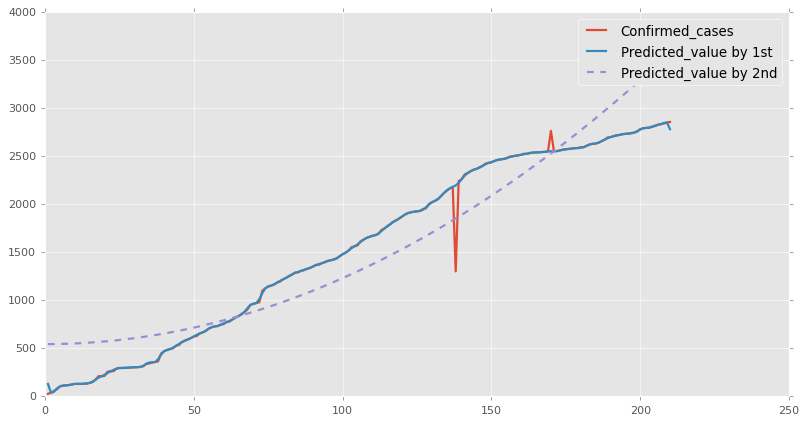

In [95]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(Days,Confirmed_cases, label='Confirmed_cases')
plt.plot(Days,svr_rbf_model1.predict(Days), label='Predicted_value by 1st' )
plt.plot(Days,svr_rbf_model2.predict(Days), linestyle='dashed', label='Predicted_value by 2nd', )

plt.legend()

In [102]:
# Testisting all ML Model on time seriese dataset